# Há muitos frameworks para Python que podem ser úteis para trabalhar com Redes Bayesianas. 

## BayesPy, pomegranate, pgmpy, bnlearn and others

# Naturalmente, há outras escritos em outras linguagens: Weka (Java), Netica (C), e outras


# Entre eles, destacamos o pgmpy para apresentar como exemplo.

-  Vamos precisar de : numpy, pandas and pgmpy


<br>
<br>
<br>

# Instalando as bibliotecas necessárias - pgmpy - Probabilitic Graphical Models Python
## https://pgmpy.org/

In [ ]:
import sys
!pip install pgmpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<br>
<br>
<br>

# Importando as bibliotecas Pandas e pgmpy

In [ ]:
import pandas as pd
import pgmpy



<br>
<br>
<br>

#Sprinkler Example

# The grass is wet!! Did it rain or the sprinkler was on?

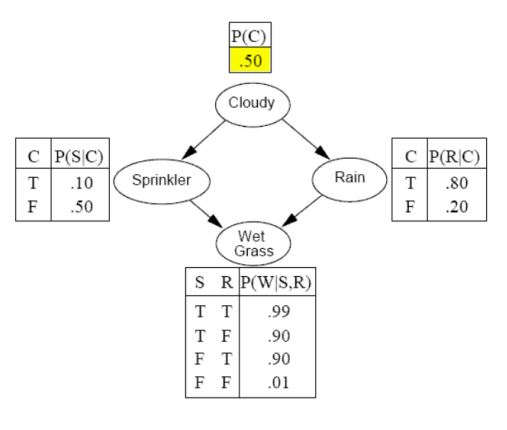


In [ ]:
from pgmpy.factors.discrete import  TabularCPD


#cloudy                                                             No cloudy=0, Cloudy=1
cloudy_cpd = TabularCPD(variable='Cloudy', variable_card=2, values=[[0.5], [0.5]])


#CPD convention in pgmpy
# (child=0|Fathers= F1=0,1,2,...,F2=0,1,2,,,)
# (child=1|Fathers= F1=0,1,2,...,F2=0,1,2,,,) 
#  (child=2|Fathers= F1=0,1,2,...,F2=0,1,2,,,)    Transposta da convencão usada na figura, considerando os complementares    

# sprinkler 
sprin_cpd = TabularCPD('Sprinkler',2,[[0.5,0.9], # Sprinkler=0
                                 [0.5,0.1]], # Sprinkler=1 # coluna mostrada na figura 
              evidence=['Cloudy'], evidence_card=[2])

#Rain
rain_cpd = TabularCPD('Rain',2,[[0.8,0.2], # Rain=0
                                [0.2,0.8]], # Rain=1 
              evidence=['Cloudy'], evidence_card=[2])



wet_cpd = TabularCPD('Wet_Grass',2,[[0.99,0.1,0.1,0.001], # Wet_Grass=0
                                 [0.01,0.90,0.9,0.99]], # Wet_Grass=1
              evidence=['Sprinkler', 'Rain'], evidence_card=[2,2])

print(cloudy_cpd,'\n',sprin_cpd,'\n',rain_cpd,'\n',wet_cpd)

+-----------+-----+
| Cloudy(0) | 0.5 |
+-----------+-----+
| Cloudy(1) | 0.5 |
+-----------+-----+ 
 +--------------+-----------+-----------+
| Cloudy       | Cloudy(0) | Cloudy(1) |
+--------------+-----------+-----------+
| Sprinkler(0) | 0.5       | 0.9       |
+--------------+-----------+-----------+
| Sprinkler(1) | 0.5       | 0.1       |
+--------------+-----------+-----------+ 
 +---------+-----------+-----------+
| Cloudy  | Cloudy(0) | Cloudy(1) |
+---------+-----------+-----------+
| Rain(0) | 0.8       | 0.2       |
+---------+-----------+-----------+
| Rain(1) | 0.2       | 0.8       |
+---------+-----------+-----------+ 
 +--------------+--------------+--------------+--------------+--------------+
| Sprinkler    | Sprinkler(0) | Sprinkler(0) | Sprinkler(1) | Sprinkler(1) |
+--------------+--------------+--------------+--------------+--------------+
| Rain         | Rain(0)      | Rain(1)      | Rain(0)      | Rain(1)      |
+--------------+--------------+--------------+-

In [ ]:
# Build the Bayesian Model
from pgmpy.models import BayesianNetwork

# Cloudy->Sprinkler  Cloudy->Rain  Rain->Wet_Grass  Sprinkler->Wet_Grass
model = BayesianNetwork([('Cloudy', 'Sprinkler'), ('Cloudy', 'Rain'),('Rain','Wet_Grass'),('Sprinkler','Wet_Grass')])  

model.add_cpds(
    cloudy_cpd,sprin_cpd,rain_cpd,wet_cpd
)

model.check_model()
model.edges()

OutEdgeView([('Cloudy', 'Sprinkler'), ('Cloudy', 'Rain'), ('Sprinkler', 'Wet_Grass'), ('Rain', 'Wet_Grass')])

# Vamos perguntar ao modelo? A grama está molhada, qual a probabilidade de ter chovido?

In [ ]:
## Infering the posterior probability
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior_p = infer.query(["Sprinkler"], evidence={"Wet_Grass": 1})  # P(Rain|Wet_Grass=True)
print(posterior_p)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+--------------+------------------+
| Sprinkler    |   phi(Sprinkler) |
+==============+==================+
| Sprinkler(0) |           0.5722 |
+--------------+------------------+
| Sprinkler(1) |           0.4278 |
+--------------+------------------+


<br>
<br>
<br>

# Outra alternativa é Parametrizar (estimar probabilidades a partir de dados) a partir de dados. Vamos carregar os dados de um arquivo de dados csv!!

In [ ]:


#Alternativamente vc pode importar de um arquivo csv em seu sistema
# df=pd.read_csv(“datafile.csv”,delimiter=';')
# No google colab, vc pode importar de repositórios github
# tenho um repositorio github com este arquivo, entao vc pode usar esta URL:

url = 'https://raw.githubusercontent.com/paulo-al-castro/datafiles/master/sprinkler.csv'
df = pd.read_csv(url)
#print(df)
#df=df.drop([0])
#print(df['Unnamed: 0'])
del df['Unnamed: 0']
print(df)


     Cloudy  Sprinkler  Rain  Wet_Grass
0         0          0     0          0
1         1          0     1          1
2         0          1     0          1
3         1          1     1          1
4         1          1     1          1
..      ...        ...   ...        ...
995       1          0     1          1
996       1          0     1          1
997       1          0     1          1
998       0          0     0          0
999       0          1     1          1

[1000 rows x 4 columns]


<br>
<br>

# Criando a estrutura da rede

In [ ]:

#model = bnlearn.structure_learning.fit(df)

from pgmpy.models import BayesianModel

# Cloudy->Sprinkler  Cloudy->Rain  Rain->Wet_Grass  Sprinkler->Wet_Grass
model = BayesianModel([('Cloudy', 'Sprinkler'), ('Cloudy', 'Rain'),('Rain','Wet_Grass'),('Sprinkler','Wet_Grass')])  

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


# Parametrizando (estimando probabilidades) o modelo

In [ ]:
from pgmpy.estimators import ParameterEstimator
pe = ParameterEstimator(model, df)

print(pe)

print("\n", pe.state_counts('Cloudy'))  # unconditional
print("\n", pe.state_counts('Wet_Grass'))  # conditional on Sprinkler and Rain


    Cloudy
0     488
1     512

 Rain           0             1      
Sprinkler      0      1      0     1
Wet_Grass                           
0          261.0   35.0   49.0   2.0
1            0.0  189.0  381.0  83.0


In [ ]:
#Estimando probabilidades
from pgmpy.estimators import MaximumLikelihoodEstimator   
mle = MaximumLikelihoodEstimator(model, df)
print(mle.estimate_cpd('Cloudy'))  # unconditional
print(mle.estimate_cpd('Sprinkler'))  # conditional
print(mle.estimate_cpd('Rain'))  # conditional
print(mle.estimate_cpd('Wet_Grass'))  # conditional

+-----------+-------+
| Cloudy(0) | 0.488 |
+-----------+-------+
| Cloudy(1) | 0.512 |
+-----------+-------+
+--------------+--------------------+------------+
| Cloudy       | Cloudy(0)          | Cloudy(1)  |
+--------------+--------------------+------------+
| Sprinkler(0) | 0.4610655737704918 | 0.91015625 |
+--------------+--------------------+------------+
| Sprinkler(1) | 0.5389344262295082 | 0.08984375 |
+--------------+--------------------+------------+
+---------+---------------------+-------------+
| Cloudy  | Cloudy(0)           | Cloudy(1)   |
+---------+---------------------+-------------+
| Rain(0) | 0.8073770491803278  | 0.177734375 |
+---------+---------------------+-------------+
| Rain(1) | 0.19262295081967212 | 0.822265625 |
+---------+---------------------+-------------+
+--------------+--------------+-----+----------------------+
| Rain         | Rain(0)      | ... | Rain(1)              |
+--------------+--------------+-----+----------------------+
| Sprinkler   

In [ ]:
# Alternativa
# Calibrate all CPDs of `model` using MLE:
model.fit(df, estimator=MaximumLikelihoodEstimator)

# Vamos perguntar ao modelo? A grama está molhada, qual a probabilidade de ter chovido?

In [ ]:
# Infering the posterior probability
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior_p = infer.query(["Rain"], evidence={"Wet_Grass": 1})
print(posterior_p)



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+---------+-------------+
| Rain    |   phi(Rain) |
+=========+=============+
| Rain(0) |      0.2861 |
+---------+-------------+
| Rain(1) |      0.7139 |
+---------+-------------+


# Vamos perguntar ao modelo? A grama está molhada, qual a probabilidade do Sprinkler ter ligado

In [ ]:
posterior_p = infer.query(["Sprinkler"], evidence={"Wet_Grass": 0})
print(posterior_p)



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+--------------+------------------+
| Sprinkler    |   phi(Sprinkler) |
+==============+==================+
| Sprinkler(0) |           0.8955 |
+--------------+------------------+
| Sprinkler(1) |           0.1045 |
+--------------+------------------+


In [ ]:
# Está nublado qual a probabilidade de chuva?
posterior_p = infer.query(["Rain"], evidence={"Cloudy": 1})
print(posterior_p)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

+---------+-------------+
| Rain    |   phi(Rain) |
+=========+=============+
| Rain(0) |      0.1777 |
+---------+-------------+
| Rain(1) |      0.8223 |
+---------+-------------+


# Qual a probabilidade de estar nublado ?

In [ ]:
posterior_p = infer.query(["Cloudy"], evidence={})
print(posterior_p)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| Cloudy    |   phi(Cloudy) |
+===========+===============+
| Cloudy(0) |        0.4880 |
+-----------+---------------+
| Cloudy(1) |        0.5120 |
+-----------+---------------+


# Criando a rede

# Outro Exemplo: Terremoto na California

# **Earthquake Example**


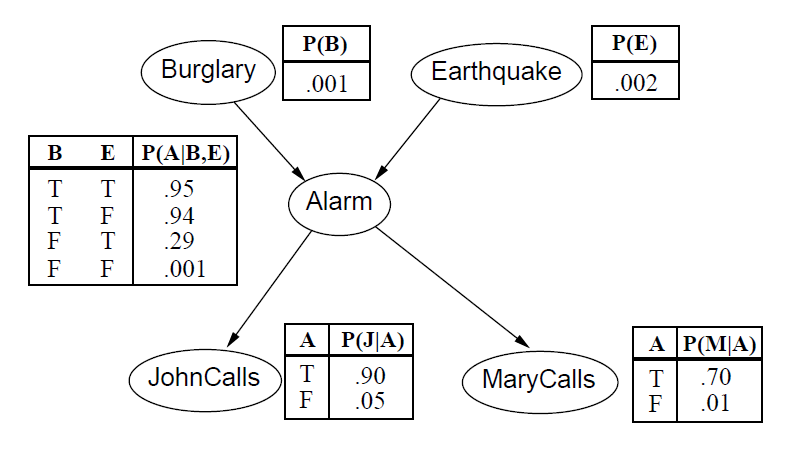

In [ ]:
# Import the library
from pgmpy.factors.discrete import TabularCPD


alarm_model = BayesianNetwork(
    [
        ("Burglary", "Alarm"),
        ("Earthquake", "Alarm"),
        ("Alarm", "JohnCalls"),
        ("Alarm", "MaryCalls"),
    ]
)

cpd_burglary = TabularCPD(
    variable="Burglary", variable_card=2, values=[[0.999], [0.001]]
)
cpd_earthquake = TabularCPD(
    variable="Earthquake", variable_card=2, values=[[0.998], [0.002]]
)
cpd_alarm = TabularCPD(
    variable="Alarm",
    variable_card=2,
    values=[[0.999, 0.71, 0.06, 0.05], [0.001, 0.29, 0.94, 0.95]],
    evidence=["Burglary", "Earthquake"],
    evidence_card=[2, 2],
)
cpd_johncalls = TabularCPD(
    variable="JohnCalls",
    variable_card=2,
    values=[[0.95, 0.1], [0.05, 0.9]],
    evidence=["Alarm"],
    evidence_card=[2],
)
cpd_marycalls = TabularCPD(
    variable="MaryCalls",
    variable_card=2,
    values=[[0.99, 0.3], [0.01, 0.7]],
    evidence=["Alarm"],
    evidence_card=[2],
)


# Associating the parameters with the model structure
alarm_model.add_cpds(
    cpd_burglary, cpd_earthquake, cpd_alarm, cpd_johncalls, cpd_marycalls
)

# Checking if the cpds are valid for the model
alarm_model.check_model()

True

In [ ]:
# Viewing nodes of the model
print(alarm_model.nodes())
# Viewing edges of the model
alarm_model.edges()

['Burglary', 'Alarm', 'Earthquake', 'JohnCalls', 'MaryCalls']


OutEdgeView([('Burglary', 'Alarm'), ('Alarm', 'JohnCalls'), ('Alarm', 'MaryCalls'), ('Earthquake', 'Alarm')])

# Inferência: John e Mary ligaram...Há assaltante??

In [ ]:

infer = VariableElimination(alarm_model)
posterior_p = infer.query(["Burglary"], evidence={'JohnCalls': 1,'MaryCalls':1,'Alarm':1})
print(posterior_p)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+-------------+-----------------+
| Burglary    |   phi(Burglary) |
+=============+=================+
| Burglary(0) |          0.6264 |
+-------------+-----------------+
| Burglary(1) |          0.3736 |
+-------------+-----------------+


In [ ]:

infer = VariableElimination(alarm_model)
posterior_p = infer.query(["Alarm"], evidence={'JohnCalls': 1,'MaryCalls':1})
print(posterior_p)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+----------+--------------+
| Alarm    |   phi(Alarm) |
+==========+==============+
| Alarm(0) |       0.2393 |
+----------+--------------+
| Alarm(1) |       0.7607 |
+----------+--------------+


# Parametrizando usando dados e uma estrutura conhecida!

# Naive Bayes

# **Tennis Dataset Example**

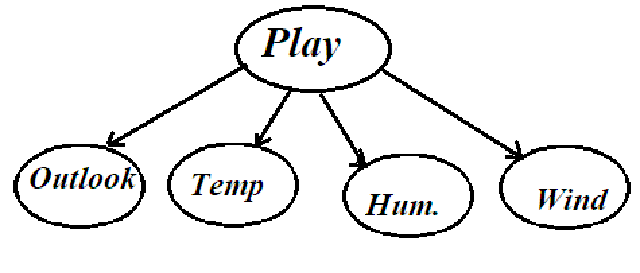



In [ ]:
# tennis data set
#outlook 1- sunny, 2 - overcast, 3 - rainy
# temperature: 1 - hot,  2 - mild, 3- cool 
#humidity: 1 - high , 2 - normal
#windy: 1 - false, 2 - true
#play - 1 -no, 2- yes 
# loading it in a Pandas DataFrame
import pandas as pd
df=pd.DataFrame([  
[1,1,1,1,1],  
[1,1,1,2,1],
[2,1,1,1,2],
[3,2,1,1,2],
[3,3,2,1,2],
[3,3,2,2,1],
[2,3,2,2,2],
[1,2,1,1,1],
[1,3,2,1,2],
[3,2,2,1,2],
[1,2,2,2,2],
[2,2,1,2,2],
[2,1,2,1,2],
[3,2,1,2,1]],
columns=['outlook','temperature','humidity','windy','play'])


print(df)

    outlook  temperature  humidity  windy  play
0         1            1         1      1     1
1         1            1         1      2     1
2         2            1         1      1     2
3         3            2         1      1     2
4         3            3         2      1     2
5         3            3         2      2     1
6         2            3         2      2     2
7         1            2         1      1     1
8         1            3         2      1     2
9         3            2         2      1     2
10        1            2         2      2     2
11        2            2         1      2     2
12        2            1         2      1     2
13        3            2         1      2     1


In [ ]:
print(df['play'].value_counts())  # counting values in a dataset

2    9
1    5
Name: play, dtype: int64


# **Como construir uma rede Bayesiana Ingênua para este problema?**


In [ ]:
from pgmpy.models import BayesianModel
# criacao da estrutura da rede
edges=[('play','windy'), # (source,destiny)
       ('play','temperature'),
       ('play','humidity'),
       ('play','outlook')]
tennisBn=BayesianModel(edges)
print(tennisBn.edges())

# parametrizacao das CPTs
tennisBn.fit(df)


for cpd in tennisBn.get_cpds():
  print(cpd)

[('play', 'windy'), ('play', 'temperature'), ('play', 'humidity'), ('play', 'outlook')]
+---------+----------+
| play(1) | 0.357143 |
+---------+----------+
| play(2) | 0.642857 |
+---------+----------+
+----------+---------+--------------------+
| play     | play(1) | play(2)            |
+----------+---------+--------------------+
| windy(1) | 0.4     | 0.6666666666666666 |
+----------+---------+--------------------+
| windy(2) | 0.6     | 0.3333333333333333 |
+----------+---------+--------------------+
+----------------+---------+--------------------+
| play           | play(1) | play(2)            |
+----------------+---------+--------------------+
| temperature(1) | 0.4     | 0.2222222222222222 |
+----------------+---------+--------------------+
| temperature(2) | 0.4     | 0.4444444444444444 |
+----------------+---------+--------------------+
| temperature(3) | 0.2     | 0.3333333333333333 |
+----------------+---------+--------------------+
+-------------+---------+--------------

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


In [ ]:
# Outra forma usando classe NaiveBayes

from pgmpy.models import NaiveBayes
model = NaiveBayes()
model.fit(df, 'play') # Nao é necessário informar a estrutura, apenas a variável dependente (a.k.a alvo ou variável classe) !

for cpd in model.get_cpds():
  print(cpd)

+---------+----------+
| play(1) | 0.357143 |
+---------+----------+
| play(2) | 0.642857 |
+---------+----------+
+------------+---------+--------------------+
| play       | play(1) | play(2)            |
+------------+---------+--------------------+
| outlook(1) | 0.6     | 0.2222222222222222 |
+------------+---------+--------------------+
| outlook(2) | 0.0     | 0.4444444444444444 |
+------------+---------+--------------------+
| outlook(3) | 0.4     | 0.3333333333333333 |
+------------+---------+--------------------+
+----------------+---------+--------------------+
| play           | play(1) | play(2)            |
+----------------+---------+--------------------+
| temperature(1) | 0.4     | 0.2222222222222222 |
+----------------+---------+--------------------+
| temperature(2) | 0.4     | 0.4444444444444444 |
+----------------+---------+--------------------+
| temperature(3) | 0.2     | 0.3333333333333333 |
+----------------+---------+--------------------+
+-------------+------

# Qual a probabilidade de jogar tênis se estiver chuvoso mas sem vento?

In [ ]:
from pgmpy.inference import VariableElimination
#outlook 1- sunny, 2 - overcast, 3 - rainy
# temperature: 1 - hot,  2 - mild, 3- cool 
#humidity: 1 - high , 2 - normal
#windy: 1 - false, 2 - true
#play - 1 -no, 2- yes 

infer = VariableElimination(model)
posterior_p = infer.query(["play"], evidence={'outlook':3,  'windy':1})
print(posterior_p)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+---------+-------------+
| play    |   phi(play) |
+=========+=============+
| play(1) |      0.2857 |
+---------+-------------+
| play(2) |      0.7143 |
+---------+-------------+


# Aprendendo a Estrutura a partir de dados!!


In [ ]:
# dados de exemplo
data = pd.DataFrame(data={'fruit': ["banana", "apple", "banana", "apple", "banana","apple", "banana",
                                    "apple", "apple", "apple", "banana", "banana", "apple", "banana",],
                          'tasty': ["yes", "no", "yes", "yes", "yes", "yes", "yes",
                                    "yes", "yes", "yes", "yes", "no", "no", "no"],
                          'size': ["large", "large", "large", "small", "large", "large", "large",
                                    "small", "large", "large", "large", "large", "small", "small"]})
print(data)

     fruit tasty   size
0   banana   yes  large
1    apple    no  large
2   banana   yes  large
3    apple   yes  small
4   banana   yes  large
5    apple   yes  large
6   banana   yes  large
7    apple   yes  small
8    apple   yes  large
9    apple   yes  large
10  banana   yes  large
11  banana    no  large
12   apple    no  small
13  banana    no  small


It is possible to learn model structure (a DAG) from a data set

The basic idea is perform model selection as an optimization task. It has two building blocks:

A scoring function score() that maps models to a numerical score, based on how well they fit to a given data set D.

A search strategy to traverse the search space of possible models M and select a model with optimal score.

Commonly used scores to measure the fit between model and data are Bayesian Dirichlet scores such as BDeu or K2 and the Bayesian Information Criterion (BIC, also called MDL). See [1], Section 18.3 for a detailed introduction on scores. As before, BDeu is dependent on an equivalent sample size.

In [ ]:
from pgmpy.estimators import BDeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
import numpy as np
# create random data sample with 3 variables, where Z is dependent on X, Y:
data = pd.DataFrame(np.random.randint(0, 4, size=(5000, 2)), columns=list('XY'))
data['Z'] = data['X'] + data['Y']

bdeu = BDeuScore(data, equivalent_sample_size=5)
k2 = K2Score(data)
bic = BicScore(data)

model1 = BayesianModel([('X', 'Z'), ('Y', 'Z')])  # X -> Z <- Y
model2 = BayesianModel([('X', 'Z'), ('X', 'Y')])  # Y <- X -> Z
# Estimar P(h_1 | e)  ---- 
print('Model 1')
print(bdeu.score(model1))
print(k2.score(model1))
print(bic.score(model1))
print('Model 2')
print(bdeu.score(model2))
print(k2.score(model2))
print(bic.score(model2))

Model 1
-13939.325875383674
-14330.073280050376
-14295.368396388883
Model 2
-20895.715473180848
-20922.570983994043
-20939.76471554292


/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


# Apesar das variações é possível perceber que o model1 ajusta-se melhor aos dados! 
### Maiores valores de score para bdeu, K2 ou bic

## The search space of DAGs is problematic for two reasons:
  

1.   exponential in the number of variables and
2.   scoring functions allow for local maxima

## The first property makes exhaustive search intractable for all but very small networks, the second prohibits efficient local optimization algorithms to always find the optimal structure.


## Despite these bad news, heuristic search strategies often yields good results.

In [ ]:
from pgmpy.estimators import ExhaustiveSearch  
# If only few nodes are involved (read: less than 5), ExhaustiveSearch can be used to compute the score for every DAG and returns the best-scoring one

es = ExhaustiveSearch(data, scoring_method=bic)
best_model = es.estimate()
print(best_model.edges())

print("\nAll DAGs by score:")
for score, dag in reversed(es.all_scores()):
    print(score, dag.edges())

 ### Once more nodes are involved, one needs to switch to heuristic search.
 
 ### For instance, **Hill Climbing search** implements a greedy local search that starts from the DAG start (default: disconnected DAG) and proceeds by iteratively performing single-edge manipulations that maximally increase the score. 
 
 ### The search terminates once a local maximum is found.

In [ ]:
from pgmpy.estimators import HillClimbSearch

# create some data with dependencies
data = pd.DataFrame(np.random.randint(0, 3, size=(2500, 8)), columns=list('ABCDEFGH'))
print(data.describe())
data['A'] += data['B'] + data['C']
data['H'] = data['G'] - data['A']

hc = HillClimbSearch(data)#,scoring_method=BicScore(data))
best_model = hc.estimate()
print(best_model.edges())

# Busca com restrições

Mesmo com buscas heurísticas, no caso de muitas variáveis o espaço de buscas de possíveis estruturas pode se tornar grande demais!!!  Há técnicas para restringir o espaço de busca, como por exemplo: limitar o número máximo de pais de cada nó, identificar independências condicionais nos dados e restringir a busca a estruturas que respeitem tais regras, e outras. 


## Veja mais opções em pgmpy.org e no livro: 
### Korb, K. Nicholson, A. Bayesian Artificial Intelligence. CRC Press.  2011.
